### Preamble:

In [23]:
import sympy as sym
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors


# Defining Variables
x, x1, x2, x3, y, y1, y2, y3, q, z = sym.symbols('x x1 x2 x3 y y1 y2 y3 q z')

#List
pointList = [[x1, y1],[x2, y2], [x3,y3]]

# Distance Function Start
def Distance(points):
    return [((x-i)**2 + (y-j)**2)**(1/2) for i,j in points]

# Finding the Hypotenuse or distance from each point to charge
def SinesAndCosines(points):
    
    distances = Distance(points)
    
    x_list, y_list = zip(*points)
    
    list_eval = lambda v, li : [(v - i)/distances[k] for k,i in enumerate(li)]
    x_eval = list_eval(x, x_list)
    y_eval = list_eval(y, y_list)

    final = zip(x_eval, y_eval)
    final = [list(i) for i in list(final)]
    
    return list(final)


# Defining a Test case
d, q1, q2 = sym.symbols('d q1 q2')

test_case = [[-d/2, 0],[d/2,0]]

charges= [q1, q2]

result = []
for i,v in enumerate(SinesAndCosines(test_case)):
    for c in SinesAndCosines(test_case)[i]:
        result.append(charges[i] * c)



# Defining the Electric Field Function
π, ϵ0 = sym.symbols('π ϵ0')


def Efields(point_list):
    charges = [i[0] for i in point_list]
    points = [i[1] for i in point_list]
    
    result=[]
    for i,v in enumerate(SinesAndCosines(points)):
        for c in SinesAndCosines(points)[i]:
            result.append(charges[i] * c)

    final=[]
    for j,l in enumerate(result):
        d = Distance(points)[j//2]
        final.append(result[j] / (d*d * 4*π*ϵ0))

    
    return final

# Test Charges
two_charges = [[q1,[-d/2,0]],[q2,[d/2,0]]]

one_charge = [[q1,[0,0]]]

# E-Field of both points
def TotalField(charges):
    return (sum(Efields(charges)[::2]), sum(Efields(charges)[1::2]))

# Defining Charge Magnitude
def MagnitudeEfield(charges):
    return sym.sqrt(sum([i**2 for i in TotalField(charges)]))

# Defining E-Potential
def Potential(charges):
    charges_only = [i[0] for i in charges]
    points = [i[1] for i in charges]
    distances = Distance(points)

    res=[]
    for i in range(0,len(charges)):
        res.append(charges_only[i]/((4*π*ϵ0)*distances[i]))
    
    return sum(res)



# Plotting Fields of Two


X = np.linspace(-1,1,27)
Y = np.linspace(-1,1,27)

xx, yy = np.meshgrid(X,Y)

(our_Ex, our_Ey) = TotalField(two_charges)

Ex_values = []
Ey_values = []


for yi in Y:
    thisline_Ex = []
    thisline_Ey = []
    
    for xi in X:
        thisline_Ex.append(our_Ex.subs({q1: 4*np.pi, q2: -4*np.pi, d: 1, π: np.pi, x: xi, y: yi, ϵ0: 1}))
        thisline_Ey.append(our_Ey.subs({q1: 4*np.pi, q2: -4*np.pi, d: 1, π: np.pi, x: xi, y: yi, ϵ0: 1}))
    
    Ex_values.append(thisline_Ex)
    Ey_values.append(thisline_Ey)


Ex_values = np.asarray(Ex_values).astype(float)
Ey_values = np.asarray(Ey_values).astype(float)


E_mags = []
for yi in Y:
    thisline = []
    # now we will step through all x locations at this yi
    for xi in X:
        # and at the point (xi,yi), we evaluate the magnitude components of the E field
        thisline.append(MagnitudeEfield(two_charges).subs({q1: 4*np.pi, q2: -4*np.pi, d: 1, π: np.pi, x: xi, y: yi, ϵ0: 8.85*(10**-12)}))
    E_mags.append(thisline)

E_mags = np.asarray(E_mags)

Ex_values_norm = Ex_values/E_mags
Ey_values_norm = Ey_values/E_mags

Ex_values_norm = Ex_values_norm.astype(float)
Ey_values_norm = Ey_values_norm.astype(float)



# CONTOURS

E_mags = E_mags.astype(float)



<h3> Problem One: A Single Charge, at Different Locations</h3>

We will start simple, and make sure you can reproduce the electric field just from a single point charge.

(a) Start by considering a charge $q = + 4 \pi \epsilon_0$, located at the origin $(0,0)$. 
You should first define the charge arrangement as was done for the case of two/four charges above.
Then you can use the existing E-field functions above (you do not need to redefine those functions, and indeed you should not redefine them!) to calculate the E-field component from this single charge at any point in $xy$ space.

For plotting, you can define the meshgrid from -1 to 1 in $x,y$, and plot normalised arrows to show the field direction, and contours for the field magnitude.
Check that the field plotted makes sense - you should see all the field lines radiating outward from the origin. 

(b) Now change only the sign of the point charge from positive to negative (with same magnitude) and replot. Verify that the field lines now all change direction, and point inward toward the charge location at the origin. 

(c) Now suppose the single point charge is located not at the origin, but instead at some point $(a,b)$.
Setup the code to plot the E field from this charge. To actually plot it, you will need to put in some values for $a,b$.
In a grid from -1 to 1 for both x and y, you could consider the charge location to be say (+0.5,-0.25).
Verify that the field lines are now centred on the new location of the charge. 


Once you have verified these single-charge fields are  correct, you can increase the complexity of the charge arrangements in the next two problems

C:\Users\masma\AppData\Local\Temp\ipykernel_8500\2682909349.py:28: RuntimeWarning: invalid value encountered in cast
  Ey_values = np.asarray(Ey_values).astype(float)
C:\Users\masma\AppData\Local\Temp\ipykernel_8500\2682909349.py:43: RuntimeWarning: invalid value encountered in divide
  Ey_values_norm = Ey_values/E_mags
C:\Users\masma\AppData\Local\Temp\ipykernel_8500\2682909349.py:45: RuntimeWarning: invalid value encountered in cast
  Ex_values_norm = Ex_values_norm.astype(float)
C:\Users\masma\AppData\Local\Temp\ipykernel_8500\2682909349.py:46: RuntimeWarning: invalid value encountered in cast
  Ey_values_norm = Ey_values_norm.astype(float)


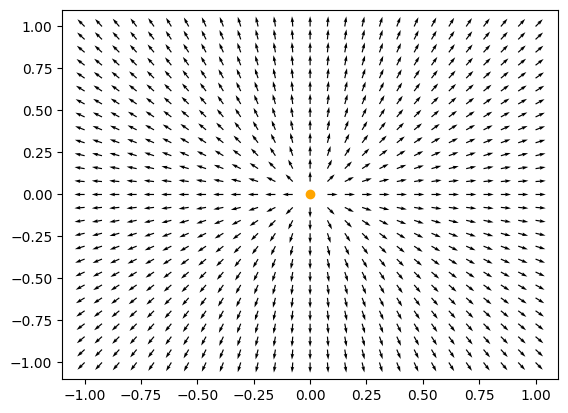

C:\Users\masma\AppData\Local\Temp\ipykernel_8500\2682909349.py:81: RuntimeWarning: invalid value encountered in cast
  Ey_values_neg = np.asarray(Ey_values_neg).astype(float)
C:\Users\masma\AppData\Local\Temp\ipykernel_8500\2682909349.py:94: RuntimeWarning: invalid value encountered in divide
  Ey_values_norm_neg = Ey_values_neg / E_mags_neg
C:\Users\masma\AppData\Local\Temp\ipykernel_8500\2682909349.py:96: RuntimeWarning: invalid value encountered in cast
  Ex_values_norm_neg = Ex_values_norm_neg.astype(float)
C:\Users\masma\AppData\Local\Temp\ipykernel_8500\2682909349.py:97: RuntimeWarning: invalid value encountered in cast
  Ey_values_norm_neg = Ey_values_norm_neg.astype(float)


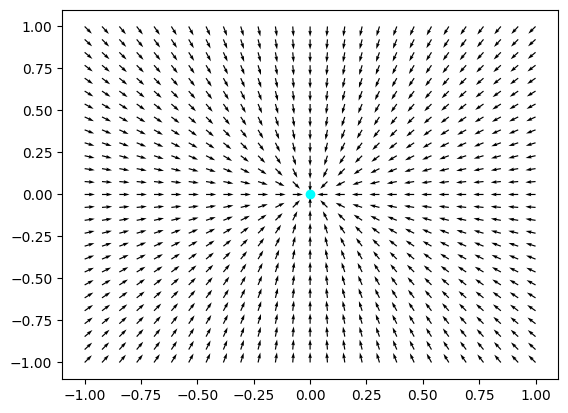

In [24]:
#POSITIVE

X2 = np.linspace(-1,1,27)
Y2 = np.linspace(-1,1,27)


xx, yy = np.meshgrid(X2,Y2)

(our_Ex, our_Ey) = TotalField(one_charge)

Ex_values = []
Ey_values = []


for yi in Y2:
    thisline_Ex = []
    thisline_Ey = []
    
    for xi in X2:
        thisline_Ex.append(our_Ex.subs({q1: ((4*np.pi)*ϵ0), d: 0, π: np.pi, x: xi, y: yi, ϵ0: 8.85*(10**-12)}))
        thisline_Ey.append(our_Ey.subs({q1: ((4*np.pi)*ϵ0), d: 0, π: np.pi, x: xi, y: yi, ϵ0: 8.85*(10**-12)}))
    
    Ex_values.append(thisline_Ex)
    Ey_values.append(thisline_Ey)


Ex_values = np.asarray(Ex_values).astype(float)
Ey_values = np.asarray(Ey_values).astype(float)


E_mags = []
for yi in Y2:
    thisline = []
    # now we will step through all x locations at this yi
    for xi in X2:
        # and at the point (xi,yi), we evaluate the magnitude components of the E field
        thisline.append(MagnitudeEfield(one_charge).subs({q1: ((4*np.pi)*ϵ0), d: 0, π: np.pi, x: xi, y: yi, ϵ0: 8.85*(10**-12)}))
    E_mags.append(thisline)

E_mags = np.asarray(E_mags)

Ex_values_norm = Ex_values/E_mags
Ey_values_norm = Ey_values/E_mags

Ex_values_norm = Ex_values_norm.astype(float)
Ey_values_norm = Ey_values_norm.astype(float)


quiv = plt.quiver(xx, yy, Ex_values_norm, Ey_values_norm)
plt.plot(0,0,marker="o",color="Orange")

plt.show()

# THE NEGATIVE

X3 = np.linspace(-1,1,27)
Y3 = np.linspace(-1,1,27)


xx2, yy2 = np.meshgrid(X3,Y3)



(our_Ex_neg, our_Ey_neg) = TotalField(one_charge)

Ex_values_neg = []
Ey_values_neg = []

for yi in Y3:
    thisline_Ex = []
    thisline_Ey = []

    for xi in X3:
        thisline_Ex.append(our_Ex_neg.subs({q1: -((4*np.pi)*ϵ0), d: 0, π: np.pi, x: xi, y: yi, ϵ0: 8.85*(10**-12)}))
        thisline_Ey.append(our_Ey_neg.subs({q1: -((4*np.pi)*ϵ0), d: 0, π: np.pi, x: xi, y: yi, ϵ0: 8.85*(10**-12)}))

    Ex_values_neg.append(thisline_Ex)
    Ey_values_neg.append(thisline_Ey)

Ex_values_neg = np.asarray(Ex_values_neg).astype(float)
Ey_values_neg = np.asarray(Ey_values_neg).astype(float)

E_mags_neg = []
for yi in Y3:
    thisline = []
    for xi in X3:
        thisline.append(MagnitudeEfield(one_charge).subs({q1: -((4*np.pi)*ϵ0), d: 0, π: np.pi, x: xi, y: yi, ϵ0: 8.85*(10**-12)}))
    E_mags_neg.append(thisline)

E_mags_neg = np.asarray(E_mags_neg)


Ex_values_norm_neg = Ex_values_neg / E_mags_neg
Ey_values_norm_neg = Ey_values_neg / E_mags_neg

Ex_values_norm_neg = Ex_values_norm_neg.astype(float)
Ey_values_norm_neg = Ey_values_norm_neg.astype(float)

quiv = plt.quiver(xx2, yy2, Ex_values_norm_neg, Ey_values_norm_neg)
plt.plot(0,0,marker="o",color="Cyan")

plt.show()





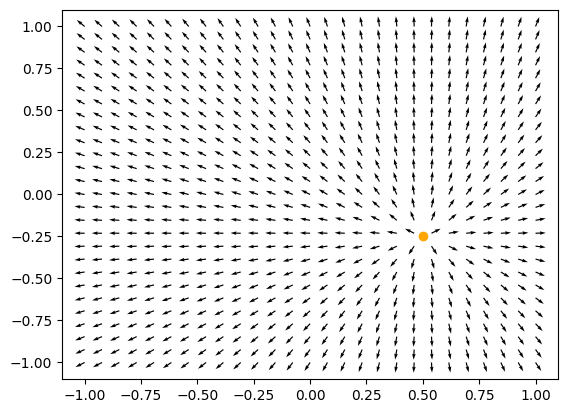

In [25]:
Charge_C = [[q1,[0.5,-0.25]]]


X2 = np.linspace(-1,1,27)
Y2 = np.linspace(-1,1,27)


xx, yy = np.meshgrid(X2,Y2)

(our_Ex, our_Ey) = TotalField(Charge_C)

Ex_values = []
Ey_values = []


for yi in Y2:
    thisline_Ex = []
    thisline_Ey = []
    
    for xi in X2:
        thisline_Ex.append(our_Ex.subs({q1: ((4*np.pi)*ϵ0), d: 0, π: np.pi, x: xi, y: yi, ϵ0: 8.85*(10**-12)}))
        thisline_Ey.append(our_Ey.subs({q1: ((4*np.pi)*ϵ0), d: 0, π: np.pi, x: xi, y: yi, ϵ0: 8.85*(10**-12)}))
    
    Ex_values.append(thisline_Ex)
    Ey_values.append(thisline_Ey)


Ex_values = np.asarray(Ex_values).astype(float)
Ey_values = np.asarray(Ey_values).astype(float)


E_mags = []
for yi in Y2:
    thisline = []
    # now we will step through all x locations at this yi
    for xi in X2:
        # and at the point (xi,yi), we evaluate the magnitude components of the E field
        thisline.append(MagnitudeEfield(Charge_C).subs({q1: ((4*np.pi)*ϵ0), d: 0, π: np.pi, x: xi, y: yi, ϵ0: 8.85*(10**-12)}))
    E_mags.append(thisline)

E_mags = np.asarray(E_mags)

Ex_values_norm = Ex_values/E_mags
Ey_values_norm = Ey_values/E_mags

Ex_values_norm = Ex_values_norm.astype(float)
Ey_values_norm = Ey_values_norm.astype(float)


quiv = plt.quiver(xx, yy, Ex_values_norm, Ey_values_norm)
plt.plot(0.5,-0.25,marker="o",color="Orange")

plt.show()

<h3>Problem Two: Eight Charges in Two Horizonal Lines</h3>

Now consider eight charges arranged in two horizontal lines, each with four equally spaced charges. Take the charges in the top line as positive charges and the charges in the bottom line as negative charges. Take the charges all to have a charge magnitude of $|q| = 4 \pi \epsilon_0$. 
Compute and plot the electric field from this charge arrangement, using a range of -1 to +1 for the x and y coordinates.
You should try some different values for the spacing between charges along a line, and for the spacing between the two lines. 
Discuss briefly what the electric field resembles in the region between the horizontal lines, and also at large distances from the charges.
<br><br>
(Note that if we increased the density of charges in this arrangement, the field produced by these charges would  approximate the field created by oppositely charged parallel plates = a capacitor!)

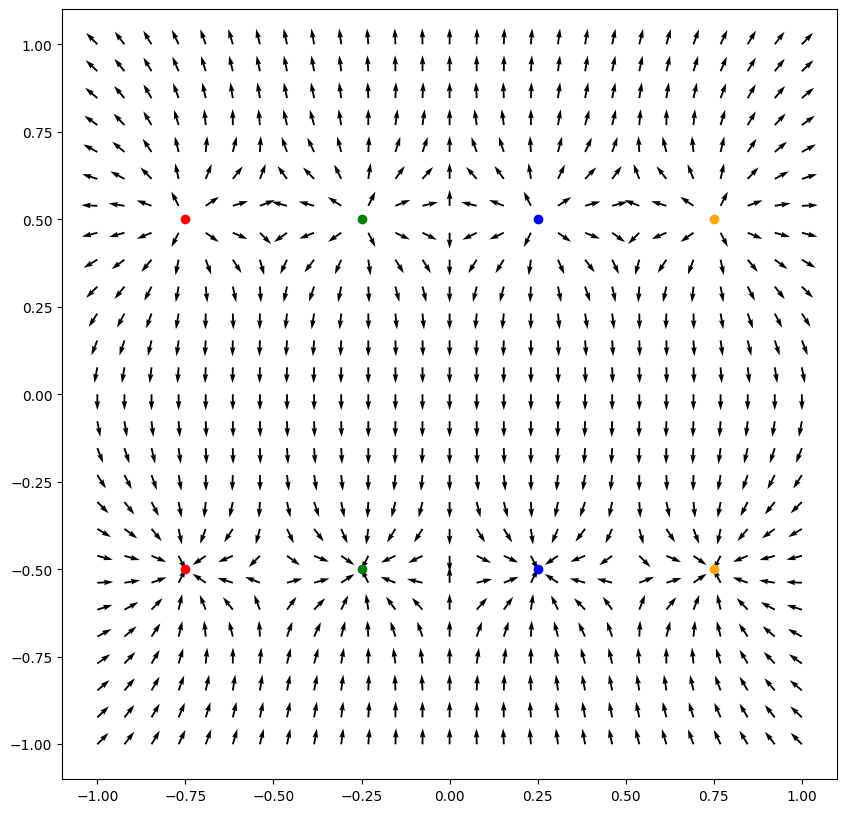

In [26]:
Eight_Charges = [[q1,[-0.75,0.5]],[q1,[-0.25,0.5]],[q1,[0.25,0.5]],[q1,[0.75,0.5]],[-q1,[-0.75,-0.5]],[-q1,[-0.25,-0.5]],[-q1,[0.25,-0.5]],[-q1,[0.75,-0.5]]]


X2 = np.linspace(-1,1,27)
Y2 = np.linspace(-1,1,27)


xx, yy = np.meshgrid(X2,Y2)

(our_Ex, our_Ey) = TotalField(Eight_Charges)


Ex_values = []
Ey_values = []


for yi in Y2:
    thisline_Ex = []
    thisline_Ey = []
    
    for xi in X2:
        thisline_Ex.append(our_Ex.subs({q1: ((4*np.pi)*ϵ0), d: 0, π: np.pi, x: xi, y: yi, ϵ0: 8.85*(10**-12)}))
        thisline_Ey.append(our_Ey.subs({q1: ((4*np.pi)*ϵ0), d: 0, π: np.pi, x: xi, y: yi, ϵ0: 8.85*(10**-12)}))
    
    Ex_values.append(thisline_Ex)
    Ey_values.append(thisline_Ey)


Ex_values = np.asarray(Ex_values).astype(float)
Ey_values = np.asarray(Ey_values).astype(float)


E_mags = []
for yi in Y2:
    thisline = []
    # now we will step through all x locations at this yi
    for xi in X2:
        # and at the point (xi,yi), we evaluate the magnitude components of the E field
        thisline.append(MagnitudeEfield(Eight_Charges).subs({q1: ((4*np.pi)*ϵ0), d: 0, π: np.pi, x: xi, y: yi, ϵ0: 8.85*(10**-12)}))
    E_mags.append(thisline)

E_mags = np.asarray(E_mags)

Ex_values_norm = Ex_values/E_mags
Ey_values_norm = Ey_values/E_mags

Ex_values_norm = Ex_values_norm.astype(float)
Ey_values_norm = Ey_values_norm.astype(float)

plt.figure(figsize=(10, 10))
quiv = plt.quiver(xx, yy, Ex_values_norm, Ey_values_norm)
plt.plot(-0.75, 0.5 ,marker="o",color="Red")
plt.plot(-0.25, 0.5 ,marker="o",color="Green")
plt.plot(0.25, 0.5 ,marker="o",color="Blue")
plt.plot(0.75, 0.5 ,marker="o",color="Orange")
plt.plot(0.75, -0.5 ,marker="o",color="Orange")
plt.plot(0.25, -0.5 ,marker="o",color="Blue")
plt.plot(-0.25, -0.5 ,marker="o",color="Green")
plt.plot(-0.75, -0.5 ,marker="o",color="Red")

plt.show()

##### The Electric Field between the horizontal lines is always pointing towards the negative charges as straight downwards from the positive charges.

<h3>Problem Three: Six Charges in a Ring</h3>

Now consider the electric field due to six charges equally spaced around a ring of radius $a$. Take the charges all to have charge $q = 4 \pi \epsilon_0$. Set up your code so that you can easily vary the radius value $a$ to try different configurations. 
Compute and plot the electric field from this charge arrangement, using a range of -1 to +1 for the x and y coordinates. First make the radius of the charges relatively large (say a=0.8) and study the electric field in between the charges. What is the electric field at the very center?
Now consider the field at distances far from the ring - you can simulate this by using a small value for the radius, such as a=0.1. 
What does the field look like at large distances?

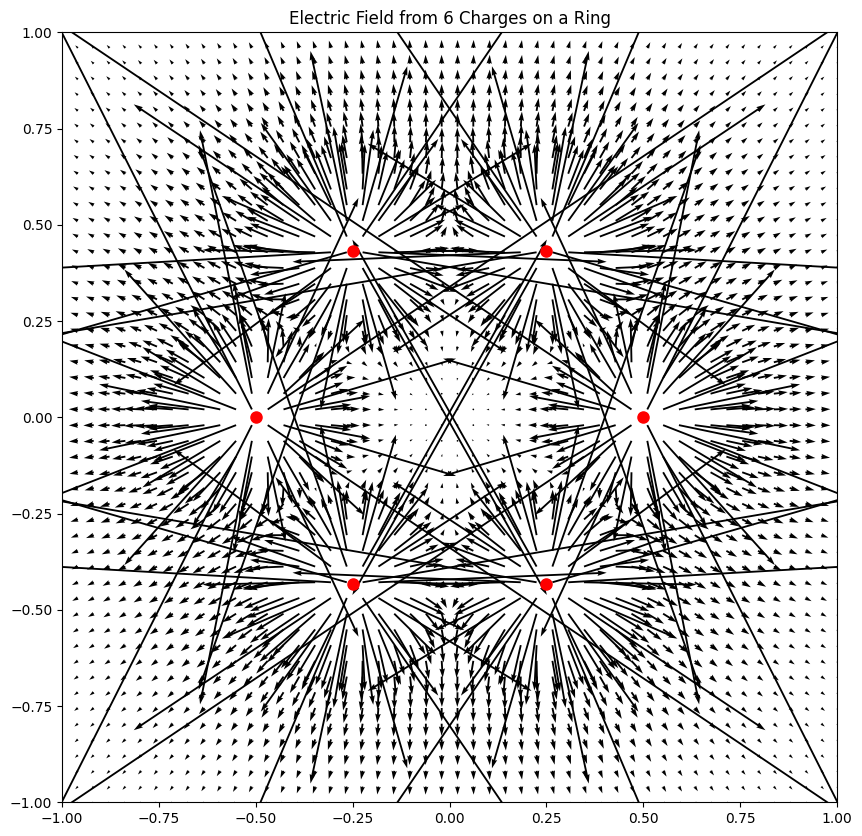

IDK why this is so wierd but it does the job


In [28]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_electric_field(x, y, charges, a, epsilon_0):
    Ex_total, Ey_total = 0, 0
    for charge in charges:
        q, (xq, yq) = charge
        r = np.sqrt((x - xq)**2 + (y - yq)**2)
        if r > 1e-6:  # Avoid division by zero
            Ex_total += q * (x - xq) / (4 * np.pi * epsilon_0 * r**3)
            Ey_total += q * (y - yq) / (4 * np.pi * epsilon_0 * r**3)
    return Ex_total, Ey_total

def plot_electric_field(charges, a, epsilon_0):
    X = np.linspace(-1, 1, 50)
    Y = np.linspace(-1, 1, 50)
    xx, yy = np.meshgrid(X, Y)
    
    Ex_values = np.zeros_like(xx)
    Ey_values = np.zeros_like(yy)
    
    for i in range(len(X)):
        for j in range(len(Y)):
            Ex_values[j, i], Ey_values[j, i] = calculate_electric_field(X[i], Y[j], charges, a, epsilon_0)
    
    plt.figure(figsize=(10, 10))
    plt.quiver(xx, yy, Ex_values, Ey_values, scale=750)
    plt.title("Electric Field from 6 Charges on a Ring")
    for charge in charges:
        q, (xq, yq) = charge
        plt.plot(xq, yq, marker='o', color='r' if q > 0 else 'b', markersize=8)
    
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.show()

# Parameters
epsilon_0 = 8.85e-12  # Vacuum permittivity
a = 0.5  # Radius of the ring

# Define charges equally spaced on a ring
charges = []
for i in range(6):
    theta = i * 2 * np.pi / 6
    xq = a * np.cos(theta)
    yq = a * np.sin(theta)
    charges.append((4 * np.pi * epsilon_0, (xq, yq)))  # Each charge q = 4πε0

# Plot the electric field
plot_electric_field(charges, a, epsilon_0)
print("IDK why this is so wierd but it does the job")

##### The field at the center is zero. The field becomes weaker between the charges at larger distances and weaker aaway from the circle.